# Abstract


### Can you identify Sarcastic sentences? 
### Can you distinguish between Fake news and Legitimate news?

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

### Dataset 

The Dataset used for this task is 'News Headlines Dataset for Sarcasm Detection' from Kaggle.

Each record consists of three attributes:

- is_sarcastic: 1 if the record is sarcastic otherwise 0

- headline: the headline of the news article

- article_link: link to the original news article. Useful in collecting supplementary data

### Deep Learning Framework

I will be using Tensorflow to implement the Deep Learning Models for this Project. 

### Import libraries

In [53]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r'N:\NATURAL LANGUAGE PROCESSING\NLP Projects\Sarcasm Detection in News Headlines')

In [3]:
df_News = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df_News.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### Exploratory Data Analysis

In [4]:
df_News.shape

(28619, 3)

In [5]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
is_sarcastic    28619 non-null int64
headline        28619 non-null object
article_link    28619 non-null object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [6]:
# looking at some sarcastic and legitimate news
df_News[df_News.is_sarcastic == 1].head(5)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...


In [7]:
df_News[df_News.is_sarcastic == 0].head(5)

,is_sarcastic,headline,article_link
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


#### Target Column Distribution

In [8]:
df_News.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

The dataset appears to be balanced for Sarcastic and legitimate news

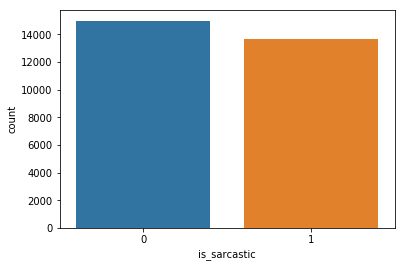

In [9]:
sns.countplot(df_News.is_sarcastic)

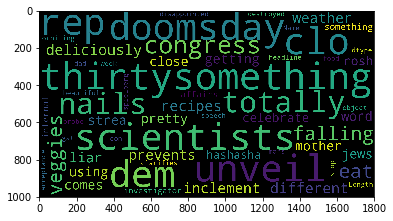

In [10]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='black',
                    stopwords = STOPWORDS,
                    max_words = 100,
                    random_state = 101, 
                    width=1800, 
                    height=1000)
wordcloud.generate(str(df_News['headline']))
plt.imshow(wordcloud)

#### Headline length distribution

In [11]:
df_News['headline_len'] = df_News.headline.apply(lambda x: len(x.split()))

In [12]:
sarcastic = df_News[df_News.is_sarcastic == 1]
legit = df_News[df_News.is_sarcastic == 0]

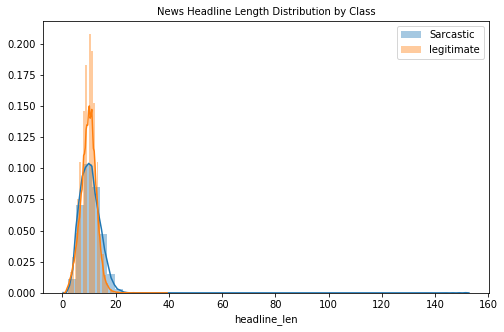

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(sarcastic.headline_len, hist= True, label= 'Sarcastic')
sns.distplot(legit.headline_len, hist= True, label= 'legitimate')
plt.legend()
plt.title('News Headline Length Distribution by Class', fontsize = 10)
plt.show()

### Data Cleaning & Pre-processing

I will be doing just some basic Pre-processing, as these are News Headlines which are written by Professionals in a formal way, so to not remove anything which can help with context, I will only remove punctuations and apply lemmatization

In [14]:
df_News = df_News.drop(columns=['article_link'])

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.corpus import stopwords

lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
punctuations = string.punctuation

In [16]:
def clean_text(news):
    """
    This function receives Text and returns clean word-list
    """
    news = news.lower()
    news = re.sub("\\n", "", news)
    #news = re.sub("\W+", " ", news)
    
    #Split the sentences into words
    words = list(news.split())
    
    words = [lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if w not in punctuations]
    #words = [w for w in words if w not in stop_words]
    #words = [''.join(x for x in w if x.isalpha()) for w in words]

    clean_sen = " ".join(words)
    
    return clean_sen

In [17]:
df_News['news_headline'] = df_News.headline.apply(lambda news: clean_text(news)) 
df_News.head()

,is_sarcastic,headline,headline_len,news_headline
0,1,thirtysomething scientists unveil doomsday clo...,8,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,13,dem rep. totally nail why congress be fall sho...
2,0,eat your veggies: 9 deliciously different recipes,7,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,8,inclement weather prevent liar from get to work
4,1,mother comes pretty close to using word 'strea...,9,mother come pretty close to use word 'streamin...


In [18]:
df_News.groupby(['is_sarcastic']).headline_len.mean()

is_sarcastic
0     9.815616
1    10.307540
Name: headline_len, dtype: float64

Lets prepare the data for Predictive Modeling now

### Stratified Split

I am using Stratified split to sample approx equal number of instances for training for both the categories of Target. 

In [19]:
headlines = df_News['news_headline']
labels = df_News['is_sarcastic'] 

In [20]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(headlines, labels, test_size=0.2, stratify=labels, random_state=42)

In [21]:
train_labels.value_counts()

0    11988
1    10907
Name: is_sarcastic, dtype: int64

### Converting News Headlines into Sequences of tokens

In [22]:
#Defining Hyperparameters to be used

max_words = 20000     # how many unique words to use (i.e num rows in embedding vector)
max_len = 60       # max number of words in a headline to use
oov_token = '<00V>'    # for the words which are not in training samples
padding_type = 'post'   # padding type
trunc_type = 'post'    # truncation for headlines longer than max length
embed_size = 64    # how big is each word vector

In [23]:
tokenizer = Tokenizer(num_words=max_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)

#word_index = tokenizer.word_index

In [24]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [25]:
train_sequences

array([[ 4249,  1037,  2950, ...,     0,     0,     0],
       [ 2067,  6634,  8466, ...,     0,     0,     0],
       [ 2580,  1232,  1114, ...,     0,     0,     0],
       ...,
       [  999,  2767,   963, ...,     0,     0,     0],
       [  302, 12050,   346, ...,     0,     0,     0],
       [  177,    95,   722, ...,     0,     0,     0]])

## Predictive Modeling

Our aim is to build a binary Classification model which given a sequence of text, can classify it as Sarcastic or not, or Fake news or real news. 

- ### A. I will try below different models and see which works best. 

    1. Neural Network with Embedding
    2. RNN(Recurrent Neural Network)
    3. LSTM(Long-short term Memory) with GlobalAveragePooling
    4. LSTM with GlobalMaxPooling
    5. Stacked LSTM
    6. Bidirectional LSTM
    7. GRU(Gated Recurrent Unit)
    8. Stacked Bidirectional LSTM
    9. Best Model from above with pre-trained Embeddings
 
 

### 1. Neural Network with Embedding

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 64)            1280000   
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,281,057
Trainable params: 1,281,057
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 19s 849us/step - loss: 0.6234 - acc: 0.6457 - val_loss: 0.4997 - val_acc: 0.7780
Epoch 2/10
22895/22895 [==============================] - 17s 729us/step - loss: 0.4240 - acc: 0.8160 - val_loss: 0.3946 - val_acc: 0.8176
Epoch 3/10
22895/22895 [==============================] - 17s 729us/step - loss: 0.2971 - acc: 0.8831 - val_loss: 0.3576 - val_acc: 0.8356
Epoch 4/10
22895/22895 [==============================] - 17s 722us/step - loss: 0.2042 - acc: 0.9287 - val_loss: 0.3550 - val_acc: 0.8426
Epoch 5/10
22895/22895 [==============================] - 16s 709us/step - loss: 0.1386 - acc: 0.9551 - val_loss: 0.3786 - val_acc: 0.8422
Epoch 6/10
22895/22895 [==============================] - 17s 760us/step - loss: 0.0917 - acc: 0.9743 - val_loss: 0.4034 - val_acc: 0.8435
Epoch 7/10
22895/22895 [==============================] - 17s 724us/step - loss: 0.0592 - acc: 0.9855 - val_loss: 0.4

5724/5724 [==============================] - 0s 22us/step
Test Loss:  0.41957801492958946
Test Accuracy 0.8424178895877009
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


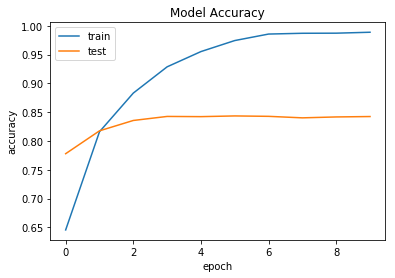

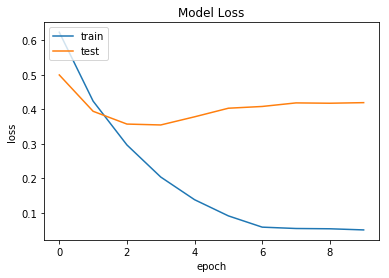

In [28]:
score = model.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2. RNN (Recurrent Neural Network)

In [29]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 60, 64)            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 60, 32)            3104      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total para

In [30]:
history_rnn = model_rnn.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 31s 1ms/step - loss: 0.6855 - acc: 0.5456 - val_loss: 0.6127 - val_acc: 0.6312
Epoch 2/10
22895/22895 [==============================] - 33s 1ms/step - loss: 0.5630 - acc: 0.6998 - val_loss: 0.4986 - val_acc: 0.7505
Epoch 3/10
22895/22895 [==============================] - 30s 1ms/step - loss: 0.4778 - acc: 0.7651 - val_loss: 0.4577 - val_acc: 0.7820
Epoch 4/10
22895/22895 [==============================] - 30s 1ms/step - loss: 0.4143 - acc: 0.8116 - val_loss: 0.4279 - val_acc: 0.8043
Epoch 5/10
22895/22895 [==============================] - 33s 1ms/step - loss: 0.3666 - acc: 0.8401 - val_loss: 0.4009 - val_acc: 0.8180
Epoch 6/10
22895/22895 [==============================] - 31s 1ms/step - loss: 0.3200 - acc: 0.8636 - val_loss: 0.3906 - val_acc: 0.8235
Epoch 7/10
22895/22895 [==============================] - 31s 1ms/step - loss: 0.2886 - acc: 0.8830 - val_loss: 0.4019 - val_acc:

5724/5724 [==============================] - 1s 197us/step
Test Loss:  0.41830251589261264
Test Accuracy 0.8331586302451368
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


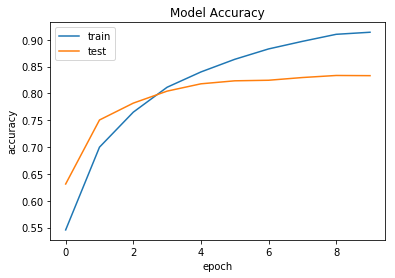

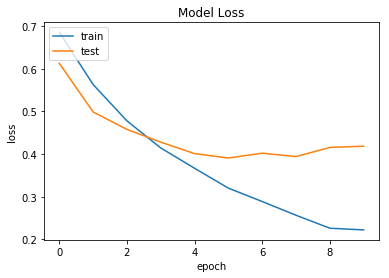

In [31]:
score = model_rnn.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_rnn.history.keys())
# summarize history for accuracy
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3. LSTM (Long Short Term Memory) with GlobalMaxPooling & SpatialDropout

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 32)            12416     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total para

In [33]:
history_lstm = model_lstm.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.6255 - acc: 0.6300 - val_loss: 0.5207 - val_acc: 0.7327
Epoch 2/10
22895/22895 [==============================] - 70s 3ms/step - loss: 0.4913 - acc: 0.7606 - val_loss: 0.4386 - val_acc: 0.7939
Epoch 3/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.4188 - acc: 0.8086 - val_loss: 0.4011 - val_acc: 0.8153
Epoch 4/10
22895/22895 [==============================] - 70s 3ms/step - loss: 0.3580 - acc: 0.8460 - val_loss: 0.3716 - val_acc: 0.8367
Epoch 5/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.2948 - acc: 0.8794 - val_loss: 0.3643 - val_acc: 0.8457
Epoch 6/10
22895/22895 [==============================] - 70s 3ms/step - loss: 0.2419 - acc: 0.9049 - val_loss: 0.3703 - val_acc: 0.8443
Epoch 7/10
22895/22895 [==============================] - 69s 3ms/step - loss: 0.2077 - acc: 0.9220 - val_loss: 0.3522 - val_acc:

5724/5724 [==============================] - 2s 436us/step
Test Loss:  0.38927802770476005
Test Accuracy 0.8565688331088847
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


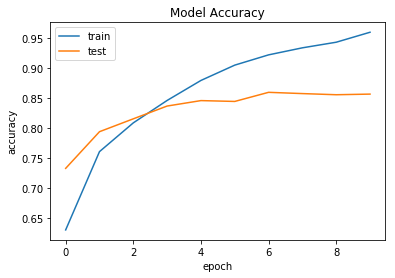

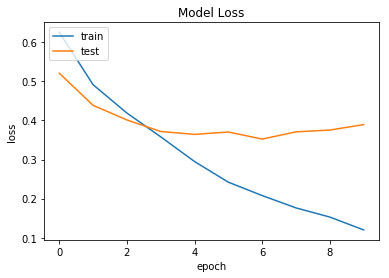

In [34]:
score = model_lstm.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm.history.keys())
# summarize history for accuracy
plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4. LSTM with GlobalAveragePool

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_lstm_avg = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_avg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_avg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total para

In [36]:
history_lstm_avg = model_lstm_avg.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.6926 - acc: 0.5226 - val_loss: 0.6917 - val_acc: 0.5236
Epoch 2/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.6005 - acc: 0.6542 - val_loss: 0.4465 - val_acc: 0.8021
Epoch 3/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.4369 - acc: 0.8077 - val_loss: 0.3843 - val_acc: 0.8260
Epoch 4/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.3497 - acc: 0.8568 - val_loss: 0.3747 - val_acc: 0.8347
Epoch 5/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.2915 - acc: 0.8873 - val_loss: 0.3415 - val_acc: 0.8522
Epoch 6/10
22895/22895 [==============================] - 70s 3ms/step - loss: 0.2519 - acc: 0.9039 - val_loss: 0.3539 - val_acc: 0.8553
Epoch 7/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.2187 - acc: 0.9199 - val_loss: 0.3662 - val_acc:

5724/5724 [==============================] - 3s 446us/step
Test Loss:  0.37798365786057264
Test Accuracy 0.8576170511382347
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


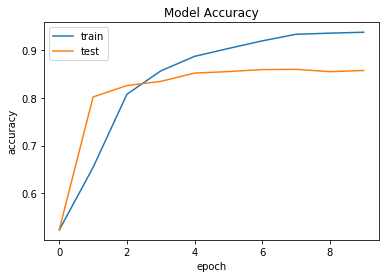

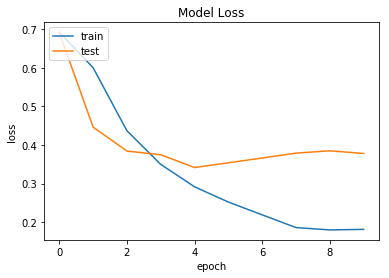

In [37]:
score = model_lstm_avg.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_avg.history.keys())
# summarize history for accuracy
plt.plot(history_lstm_avg.history['acc'])
plt.plot(history_lstm_avg.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm_avg.history['loss'])
plt.plot(history_lstm_avg.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5. LSTM with only one FC Dense Layer

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_lstm1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,292,449
Trainable params: 1,292,449
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_lstm1 = model_lstm1.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 74s 3ms/step - loss: 0.6073 - acc: 0.6469 - val_loss: 0.4999 - val_acc: 0.7621
Epoch 2/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.4529 - acc: 0.7799 - val_loss: 0.4157 - val_acc: 0.8089
Epoch 3/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.3746 - acc: 0.8306 - val_loss: 0.3645 - val_acc: 0.8374
Epoch 4/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.3012 - acc: 0.8744 - val_loss: 0.3479 - val_acc: 0.8496
Epoch 5/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.2515 - acc: 0.8970 - val_loss: 0.3340 - val_acc: 0.8576
Epoch 6/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.2099 - acc: 0.9175 - val_loss: 0.3397 - val_acc: 0.8585
Epoch 7/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.1806 - acc: 0.9299 - val_loss: 0.3597 - val_acc:

5724/5724 [==============================] - 3s 470us/step
Test Loss:  0.35365042821416315
Test Accuracy 0.8616352202507435
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


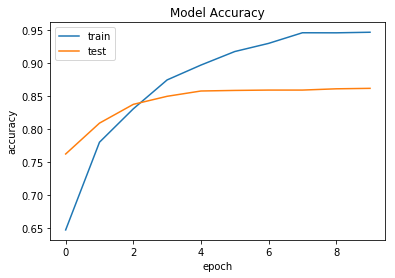

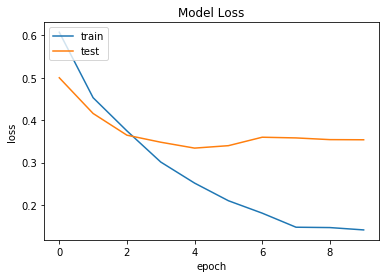

In [40]:
score = model_lstm1.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm1.history.keys())
# summarize history for accuracy
plt.plot(history_lstm1.history['acc'])
plt.plot(history_lstm1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm1.history['loss'])
plt.plot(history_lstm1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6. Stacked LSTM 

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_st_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_st_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_st_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 32)            8320      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
__________

In [42]:
history_st_lstm = model_st_lstm.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 109s 5ms/step - loss: 0.6408 - acc: 0.6042 - val_loss: 0.5200 - val_acc: 0.7358
Epoch 2/10
22895/22895 [==============================] - 106s 5ms/step - loss: 0.4803 - acc: 0.7630 - val_loss: 0.4276 - val_acc: 0.7956
Epoch 3/10
22895/22895 [==============================] - 107s 5ms/step - loss: 0.3907 - acc: 0.8245 - val_loss: 0.3769 - val_acc: 0.8307
Epoch 4/10
22895/22895 [==============================] - 108s 5ms/step - loss: 0.3141 - acc: 0.8691 - val_loss: 0.3561 - val_acc: 0.8475
Epoch 5/10
22895/22895 [==============================] - 110s 5ms/step - loss: 0.2686 - acc: 0.8946 - val_loss: 0.3703 - val_acc: 0.8429
Epoch 6/10
22895/22895 [==============================] - 134s 6ms/step - loss: 0.2278 - acc: 0.9126 - val_loss: 0.3742 - val_acc: 0.8559
Epoch 7/10
22895/22895 [==============================] - 120s 5ms/step - loss: 0.1874 - acc: 0.9299 - val_loss: 0.3771 - v

5724/5724 [==============================] - 5s 848us/step
Test Loss:  0.38278050426000654
Test Accuracy 0.8558700208810557
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


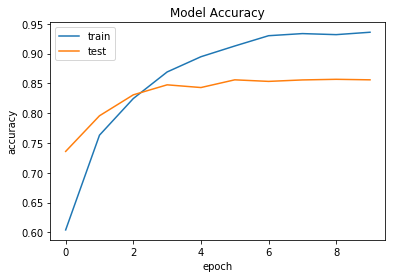

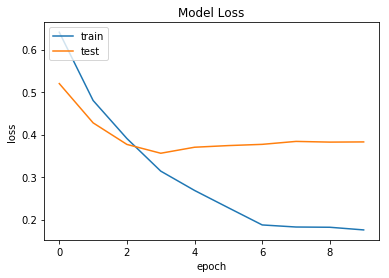

In [43]:
score = model_st_lstm.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_st_lstm.history.keys())
# summarize history for accuracy
plt.plot(history_st_lstm.history['acc'])
plt.plot(history_st_lstm.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_st_lstm.history['loss'])
plt.plot(history_st_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7. GRU (Gated Recurrent Unit)

In [44]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
gru (GRU)                    (None, 60, 32)            9312      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 1,289,857
Trainable params: 1,289,857
Non-trainable params: 0
_________________________________________________________________


In [45]:
history_gru = model_gru.fit(train_sequences, train_labels, batch_size=32, epochs=15, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/15
22895/22895 [==============================] - 64s 3ms/step - loss: 0.5973 - acc: 0.6568 - val_loss: 0.4705 - val_acc: 0.7713
Epoch 2/15
22895/22895 [==============================] - 62s 3ms/step - loss: 0.4260 - acc: 0.8001 - val_loss: 0.3834 - val_acc: 0.8222
Epoch 3/15
22895/22895 [==============================] - 62s 3ms/step - loss: 0.3292 - acc: 0.8584 - val_loss: 0.3684 - val_acc: 0.8339
Epoch 4/15
22895/22895 [==============================] - 61s 3ms/step - loss: 0.2591 - acc: 0.8972 - val_loss: 0.3870 - val_acc: 0.8318
Epoch 5/15
22895/22895 [==============================] - 62s 3ms/step - loss: 0.2099 - acc: 0.9181 - val_loss: 0.3845 - val_acc: 0.8384
Epoch 6/15
22895/22895 [==============================] - 62s 3ms/step - loss: 0.1640 - acc: 0.9426 - val_loss: 0.3920 - val_acc: 0.8466
Epoch 7/15
22895/22895 [==============================] - 62s 3ms/step - loss: 0.1556 - acc: 0.9430 - val_loss: 0.3994 - val_acc:

5724/5724 [==============================] - 2s 319us/step
Test Loss:  0.4016297634542613
Test Accuracy 0.8459119496855346
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


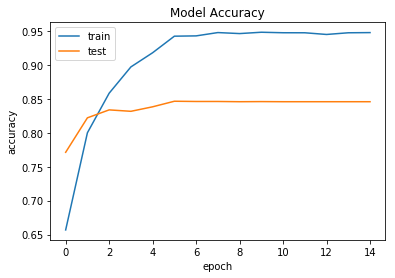

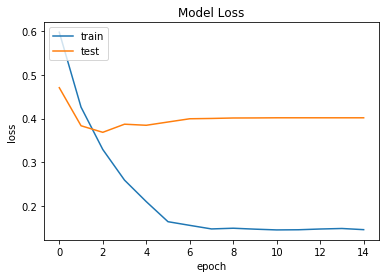

In [46]:
score = model_gru.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_gru.history.keys())
# summarize history for accuracy
plt.plot(history_gru.history['acc'])
plt.plot(history_gru.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 8. Bidirectional LSTM

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_bidir = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 64)            24832     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 1,305,889
Trainable params: 1,305,889
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_bidir = model_bidir.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 61s 3ms/step - loss: 0.5207 - acc: 0.7246 - val_loss: 0.3897 - val_acc: 0.8223
Epoch 2/10
22895/22895 [==============================] - 62s 3ms/step - loss: 0.3147 - acc: 0.8704 - val_loss: 0.3416 - val_acc: 0.8484
Epoch 3/10
22895/22895 [==============================] - 67s 3ms/step - loss: 0.2102 - acc: 0.9199 - val_loss: 0.3552 - val_acc: 0.8491
Epoch 4/10
22895/22895 [==============================] - 71s 3ms/step - loss: 0.1428 - acc: 0.9491 - val_loss: 0.4019 - val_acc: 0.8452
Epoch 5/10
22895/22895 [==============================] - 76s 3ms/step - loss: 0.0781 - acc: 0.9770 - val_loss: 0.4330 - val_acc: 0.8546
Epoch 6/10
22895/22895 [==============================] - 74s 3ms/step - loss: 0.0689 - acc: 0.9796 - val_loss: 0.4538 - val_acc: 0.8529
Epoch 7/10
22895/22895 [==============================] - 73s 3ms/step - loss: 0.0609 - acc: 0.9832 - val_loss: 0.4606 - val_acc:

5724/5724 [==============================] - 3s 508us/step
Test Loss:  0.46509092967048715
Test Accuracy 0.8541229908321388
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


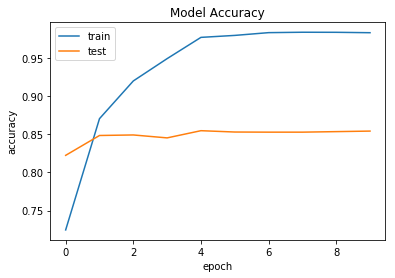

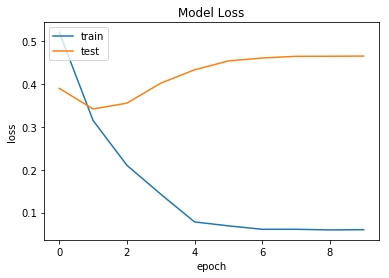

In [56]:
score = model_bidir.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bidir.history.keys())
# summarize history for accuracy
plt.plot(history_bidir.history['acc'])
plt.plot(history_bidir.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 9. Stacked Bidirectional LSTM 

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_st_bidir = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_st_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_st_bidir.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 60, 64)            1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 60, 64)            24832     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 1,329,729
Trainable params: 1,329,729
Non-trainable params: 0
_________________________________________________________________


In [58]:
history_st_bidir = model_st_bidir.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 130s 6ms/step - loss: 0.4791 - acc: 0.7537 - val_loss: 0.3751 - val_acc: 0.8332
Epoch 2/10
22895/22895 [==============================] - 117s 5ms/step - loss: 0.2844 - acc: 0.8777 - val_loss: 0.3522 - val_acc: 0.8400
Epoch 3/10
22895/22895 [==============================] - 120s 5ms/step - loss: 0.1847 - acc: 0.9282 - val_loss: 0.3571 - val_acc: 0.8450
Epoch 4/10
22895/22895 [==============================] - 121s 5ms/step - loss: 0.1155 - acc: 0.9586 - val_loss: 0.3997 - val_acc: 0.8536
Epoch 5/10
22895/22895 [==============================] - 121s 5ms/step - loss: 0.0550 - acc: 0.9829 - val_loss: 0.4906 - val_acc: 0.8522
Epoch 6/10
22895/22895 [==============================] - 123s 5ms/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.5588 - val_acc: 0.8494
Epoch 7/10
22895/22895 [==============================] - 120s 5ms/step - loss: 0.0393 - acc: 0.9889 - val_loss: 0.5592 - v

5724/5724 [==============================] - 6s 1ms/step
Test Loss:  0.5657638216626802
Test Accuracy 0.84905660369028
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


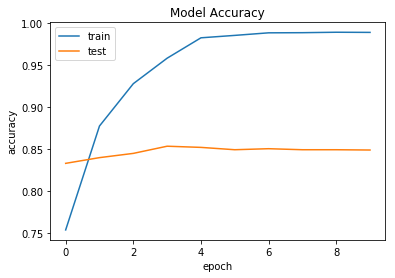

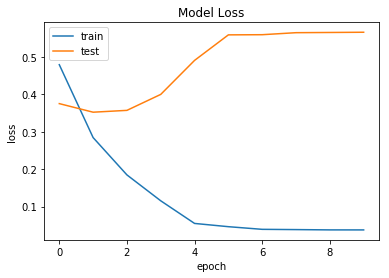

In [59]:
score = model_st_bidir.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_st_bidir.history.keys())
# summarize history for accuracy
plt.plot(history_st_bidir.history['acc'])
plt.plot(history_st_bidir.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_st_bidir.history['loss'])
plt.plot(history_st_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 10. Birectional LSTM without GlobalPooling and only 1 FC Dense layer

In [60]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_bidir_tune = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir_tune.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir_tune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 60, 64)            1280000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_bidir_tune = model_bidir_tune.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 113s 5ms/step - loss: 0.4858 - acc: 0.7475 - val_loss: 0.3656 - val_acc: 0.8374
Epoch 2/10
22895/22895 [==============================] - 91s 4ms/step - loss: 0.2713 - acc: 0.8857 - val_loss: 0.3366 - val_acc: 0.8473
Epoch 3/10
22895/22895 [==============================] - 92s 4ms/step - loss: 0.1756 - acc: 0.9312 - val_loss: 0.3575 - val_acc: 0.8595
Epoch 4/10
22895/22895 [==============================] - 94s 4ms/step - loss: 0.1140 - acc: 0.9591 - val_loss: 0.4039 - val_acc: 0.8466
Epoch 5/10
22895/22895 [==============================] - 91s 4ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.4262 - val_acc: 0.8580
Epoch 6/10
22895/22895 [==============================] - 92s 4ms/step - loss: 0.0474 - acc: 0.9869 - val_loss: 0.4463 - val_acc: 0.8557
Epoch 7/10
22895/22895 [==============================] - 92s 4ms/step - loss: 0.0409 - acc: 0.9894 - val_loss: 0.4540 - val_acc

5724/5724 [==============================] - 4s 636us/step
Test Loss:  0.4576683584665769
Test Accuracy 0.8588399719642144
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


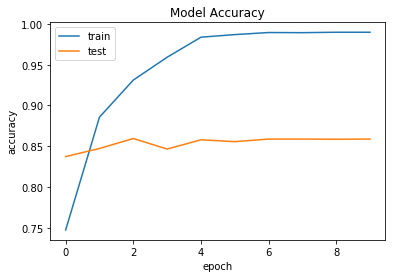

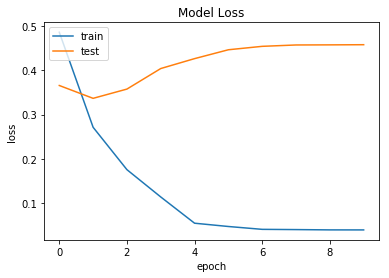

In [62]:
score = model_bidir_tune.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bidir_tune.history.keys())
# summarize history for accuracy
plt.plot(history_bidir_tune.history['acc'])
plt.plot(history_bidir_tune.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir_tune.history['loss'])
plt.plot(history_bidir_tune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Tuning the Best models

In [66]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_lstm2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 60, 64)            0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60, 64)            24832     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 1,304,897
Trainable params: 1,304,897
Non-trainable params: 0
_________________________________________________________________


In [67]:
history_lstm2 = model_lstm2.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 60s 3ms/step - loss: 0.6305 - acc: 0.6064 - val_loss: 0.4519 - val_acc: 0.7834
Epoch 2/10
22895/22895 [==============================] - 62s 3ms/step - loss: 0.3971 - acc: 0.8186 - val_loss: 0.3587 - val_acc: 0.8374
Epoch 3/10
22895/22895 [==============================] - 72s 3ms/step - loss: 0.2922 - acc: 0.8776 - val_loss: 0.3368 - val_acc: 0.8580
Epoch 4/10
22895/22895 [==============================] - 78s 3ms/step - loss: 0.2305 - acc: 0.9078 - val_loss: 0.3350 - val_acc: 0.8618
Epoch 5/10
22895/22895 [==============================] - 67s 3ms/step - loss: 0.1874 - acc: 0.9290 - val_loss: 0.3475 - val_acc: 0.8592
Epoch 6/10
22895/22895 [==============================] - 66s 3ms/step - loss: 0.1535 - acc: 0.9430 - val_loss: 0.3782 - val_acc: 0.8566
Epoch 7/10
22895/22895 [==============================] - 67s 3ms/step - loss: 0.1146 - acc: 0.9592 - val_loss: 0.4013 - val_acc:

5724/5724 [==============================] - 2s 436us/step
Test Loss:  0.4135424006368463
Test Accuracy 0.8555206148712723
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


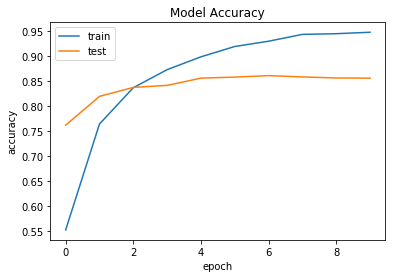

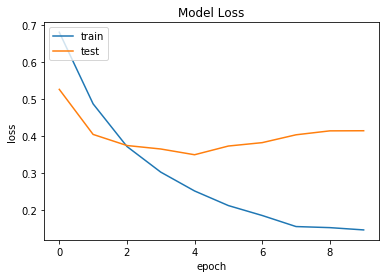

In [65]:
score = model_lstm2.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm2.history.keys())
# summarize history for accuracy
plt.plot(history_lstm2.history['acc'])
plt.plot(history_lstm2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm2.history['loss'])
plt.plot(history_lstm2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

model_lstm_tuned = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.3, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_tuned.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_tuned.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 32)            12416     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total para

In [70]:
history_lstm_tuned = model_lstm_tuned.fit(train_sequences, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/10
22895/22895 [==============================] - 63s 3ms/step - loss: 0.6399 - acc: 0.6145 - val_loss: 0.5288 - val_acc: 0.7353
Epoch 2/10
22895/22895 [==============================] - 64s 3ms/step - loss: 0.5076 - acc: 0.7506 - val_loss: 0.4573 - val_acc: 0.7745
Epoch 3/10
22895/22895 [==============================] - 60s 3ms/step - loss: 0.4320 - acc: 0.8051 - val_loss: 0.4096 - val_acc: 0.8111
Epoch 4/10
22895/22895 [==============================] - 63s 3ms/step - loss: 0.3612 - acc: 0.8462 - val_loss: 0.3744 - val_acc: 0.8330
Epoch 5/10
22895/22895 [==============================] - 66s 3ms/step - loss: 0.3015 - acc: 0.8788 - val_loss: 0.3550 - val_acc: 0.8417
Epoch 6/10
22895/22895 [==============================] - 68s 3ms/step - loss: 0.2544 - acc: 0.9028 - val_loss: 0.3614 - val_acc: 0.8512
Epoch 7/10
22895/22895 [==============================] - 68s 3ms/step - loss: 0.2207 - acc: 0.9165 - val_loss: 0.3547 - val_acc:

5724/5724 [==============================] - 3s 480us/step
Test Loss:  0.3928747713815741
Test Accuracy 0.856918239118668
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


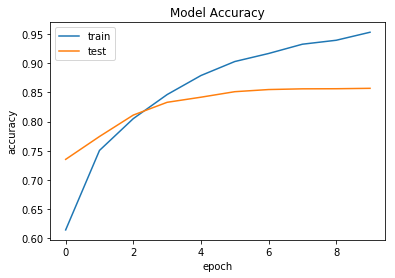

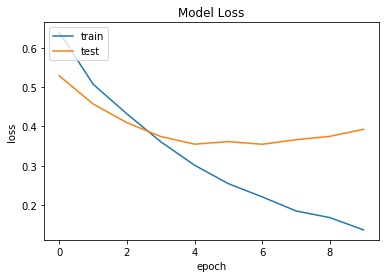

In [71]:
score = model_lstm_tuned.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_tuned.history.keys())
# summarize history for accuracy
plt.plot(history_lstm_tuned.history['acc'])
plt.plot(history_lstm_tuned.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm_tuned.history['loss'])
plt.plot(history_lstm_tuned.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 10. Best model from above with Pre-Trained Word Embeddings (Wiki News Fast text)

In [103]:
import numpy as np

EMBEDDING_FILE = 'wiki-news-300d-1M.vec'

def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.split(" ")) 
                        for o in open(EMBEDDING_FILE, encoding="utf-8") if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [108]:
model_wiki = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embed_size, input_length=max_len, weights=[embedding_matrix]),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_wiki.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_wiki.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 60, 300)           6000000   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 60, 300)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 60, 32)            42624     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total para

In [111]:
history_wiki = model_wiki.fit(train_sequences, train_labels, batch_size=32, epochs=3, 
                    validation_data=(test_sequences, test_labels), 
                    callbacks=[rlrp] ,verbose=1)

Train on 22895 samples, validate on 5724 samples
Epoch 1/3
22895/22895 [==============================] - 194s 8ms/step - loss: 0.0569 - acc: 0.9824 - val_loss: 0.5196 - val_acc: 0.8594
Epoch 2/3
22895/22895 [==============================] - 203s 9ms/step - loss: 0.0528 - acc: 0.9839 - val_loss: 0.5587 - val_acc: 0.8580
Epoch 3/3
22895/22895 [==============================] - 207s 9ms/step - loss: 0.0488 - acc: 0.9856 - val_loss: 0.5732 - val_acc: 0.8553


5724/5724 [==============================] - 9s 2ms/step
Test Loss:  0.5063309388757169
Test Accuracy 0.8572676449618416
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


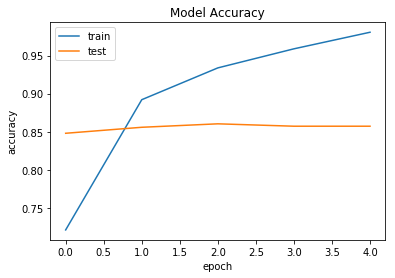

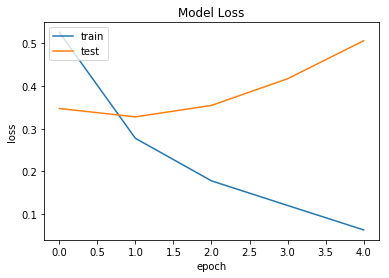

In [110]:
score = model_wiki.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_wiki.history.keys())
# summarize history for accuracy
plt.plot(history_wiki.history['acc'])
plt.plot(history_wiki.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_wiki.history['loss'])
plt.plot(history_wiki.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the best model

In [72]:
model_lstm1.save('model_sarcasm.h5')

### Prediction Pipeline using the Best Model

In [73]:
from tensorflow.keras.models import load_model

In [75]:
model = load_model('model_sarcasm.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 64)            1280000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 60, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,292,449
Trainable params: 1,292,449
Non-trainable params: 0
_________________________________________________________________


In [96]:
max_len = 60       # max number of words in a headline to use
padding_type = 'post'   # padding type
trunc_type = 'post'    # truncation for headlines longer than max length
embed_size = 64    # how big is each word vector

def predict_sarcasm(sentences):
    clean_sentences = list(map(clean_text, sentences))
    print('Cleaned Sentences - ', clean_sentences)
    sequence = tokenizer.texts_to_sequences(clean_sentences)
    sequence = pad_sequences(sequence, maxlen=max_len, padding=padding_type, truncating=trunc_type)
    
    predictions = model.predict(sequence)
    print(predictions)
    
    prediction_labels = []
    for pred in predictions:
        if pred >=0.5:
            prediction_labels.append('Sarcastic News')
        else:
            prediction_labels.append('Legit News')

    return prediction_labels

In [98]:
predict_sarcasm(['Aliens are feared by humans doomsday war', 
                'The weather today is bright and sunny'])

Cleaned Sentences -  ['alien be fear by humans doomsday war', 'the weather today be bright and sunny']
[[7.4092495e-01]
 [1.0025646e-04]]


['Sarcastic News', 'Legit News']

## Conclusion

I have tried various variations of different models and also did a bit of Hyperparameter tuning, the best model is the one which used LSTM, GlobalMaxPooling and Spatial Dropout. The embeddings in this are trained from scratch from the corpus. 

The Best Test Accuracy is - 86.16%
The best Test Loss - 0.3536

In the next Notebook, I will join the two Data Sources together and see how much that affects performance.

## License 

MIT License

Copyright (c) 2020 Nikhil Kohli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.